In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/raw/global_cancer_patients.csv")
data


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [14]:
data.head(5)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [23]:
data.shape

(50000, 15)

Dataset contains 50,000 patient records and 15 variables.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

Gender, Country_Region, Cancer_Type are categorical variables.
Age,Treatment_Cost_USD,Survival_Years,Target_Severity_Score are Numerical Variables.

In [25]:
data.isnull().sum()


Patient_ID               0.0
Age                      0.0
Gender                   0.0
Country_Region           0.0
Year                     0.0
Genetic_Risk             0.0
Air_Pollution            0.0
Alcohol_Use              0.0
Smoking                  0.0
Obesity_Level            0.0
Cancer_Type              0.0
Cancer_Stage             0.0
Treatment_Cost_USD       0.0
Survival_Years           0.0
Target_Severity_Score    0.0
dtype: float64

No significant missing values observed.

In [27]:
data.duplicated().sum()

np.int64(0)

### Duplicate Records Check

No duplicate records were found in the dataset.
Each patient entry appears to be unique, indicating good data quality and eliminating the need for duplicate removal during preprocessing.

In [28]:
data.nunique()

Patient_ID               50000
Age                         70
Gender                       3
Country_Region              10
Year                        10
Genetic_Risk               101
Air_Pollution              101
Alcohol_Use                101
Smoking                    101
Obesity_Level              101
Cancer_Type                  8
Cancer_Stage                 5
Treatment_Cost_USD       49861
Survival_Years             101
Target_Severity_Score      744
dtype: int64

### Unique Value Analysis

The dataset contains 50,000 unique Patient_ID values, confirming that each record represents an individual patient.

Categorical variables such as Gender (3 categories), Country_Region (10 regions), Cancer_Type (8 types), and Cancer_Stage (5 stages) indicate diverse demographic and clinical coverage suitable for comparative analysis.

Risk factor variables (Genetic_Risk, Air_Pollution, Alcohol_Use, Smoking, Obesity_Level) each contain 101 unique values, suggesting they are continuous or scaled numerical indicators rather than categorical labels.

Treatment_Cost_USD shows high variability (49,861 unique values), indicating significant differences in treatment expenses across patients.

Outcome variables such as Survival_Years and Target_Severity_Score also display wide variation, making them suitable for statistical and correlation analysis.

In [38]:
data.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


### Statistical Summary Observations

The dataset contains 50,000 complete records across all numerical variables, indicating no missing values in key quantitative features.

The average patient age is approximately 54 years, with ages ranging from 20 to 89 years, suggesting the dataset primarily represents adult and elderly populations commonly associated with cancer diagnosis.

Risk factor variables (Genetic_Risk, Air_Pollution, Alcohol_Use, Smoking, and Obesity_Level) have mean values close to 5 with symmetric quartile distributions, indicating a balanced spread of lifestyle and environmental risk exposure among patients.

Treatment costs show substantial variability, ranging from approximately $5,000 to over $76,000 (75th percentile), highlighting significant economic differences in cancer treatment expenses.

Survival_Years has a median value near 5 years, suggesting moderate survival outcomes across patients, while Target_Severity_Score is centered around 5 with relatively low standard deviation, indicating controlled variation in severity measurements.

Overall, the numerical variables appear well-distributed without extreme anomalies, making the dataset suitable for further exploratory and statistical analysis.

### Column Classification

Identifier:
- Patient_ID

Categorical Variables:
- Gender
- Country_Region
- Cancer_Type
- Cancer_Stage

Numerical Variables:
- Age
- Treatment_Cost_USD
- Survival_Years
- Target_Severity_Score

Risk Factors:
- Smoking
- Alcohol_Use
- Genetic_Risk
- Air_Pollution
- Obesity_Level

**Insight:**
The balanced distributions across risk factors and outcomes suggest the dataset is well-suited for correlation analysis and predictive modeling in later stages of the project.

# Descriptive analysis


In [ ]:
#Age column

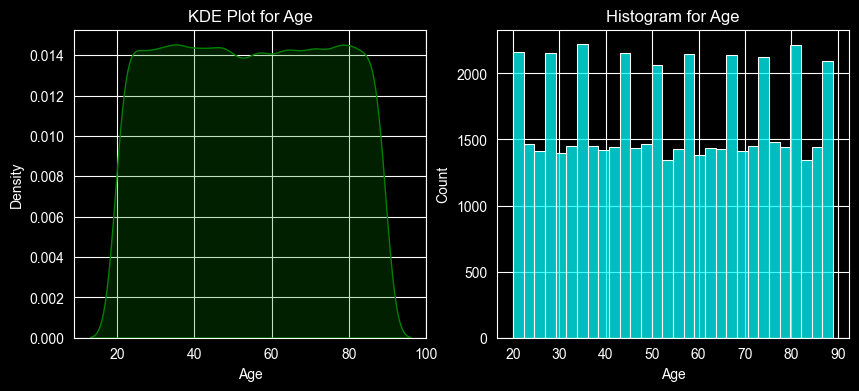

In [15]:

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data["Age"] , fill=True ,color = "green")
plt.title("KDE Plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Age"] , bins=30 ,kde = False, color = "cyan")
plt.title("Histogram for Age")
plt.show()


In [25]:
data["Age"].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

In [ ]:

"""
AGE COLUMN--:
Range:20 to 89 years
Mean Age:54.42 years
Standard Deviation:20.22
Interquartile Range(IQR) : 37 to 72
This suggest a board representation of both young and elder patients in the dataset,which support age-based comparative analysis.
AGe is the numerical column
"""

In [ ]:
#Gender Column

C:\Users\prath\AppData\Local\Temp\ipykernel_2608\1304035085.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Gender'].value_counts().index,


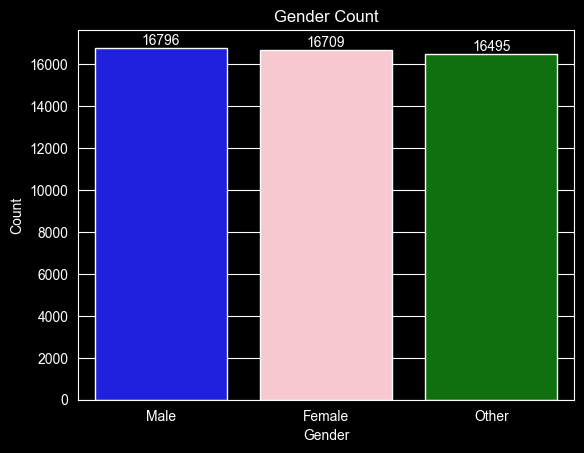

In [37]:
data["Gender"].value_counts()


sns.barplot(x=data['Gender'].value_counts().index,
            y=data['Gender'].value_counts().values,
            palette=['blue','pink','green'])
for i , v in enumerate(data['Gender'].value_counts()):
    plt.text(i,v,str(v) , ha='center', va='bottom')
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [ ]:
"""
GENDER COLUMN--:
THe dataset contains three gender categories(male,female,other) with the most common being male(16,796 records).
Gender distribution is sufficient for evaluating gender_specific
survival trends and severity outcomes.
Gender is categorical column
   """

In [ ]:
#Countries column

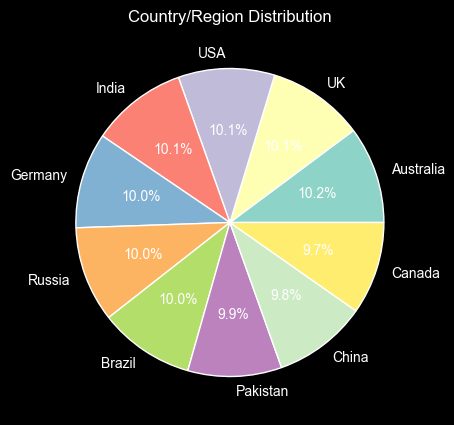

In [8]:
country_counts=data["Country_Region"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(x=country_counts.values,
        labels=country_counts.index,
        autopct='%1.1f%%',
        )
plt.title("Country/Region Distribution")
plt.show()


In [ ]:
"""
COUNTRY_REGION COLUMN--:
Patient come from 10 different countries/regions ,with australia begin
the most represented 5,092patients.
This diversity enables cross - country comparison of cancer outcomes and treatment economic
Country_region is categorical column
   """

In [ ]:
#Cancer type Column

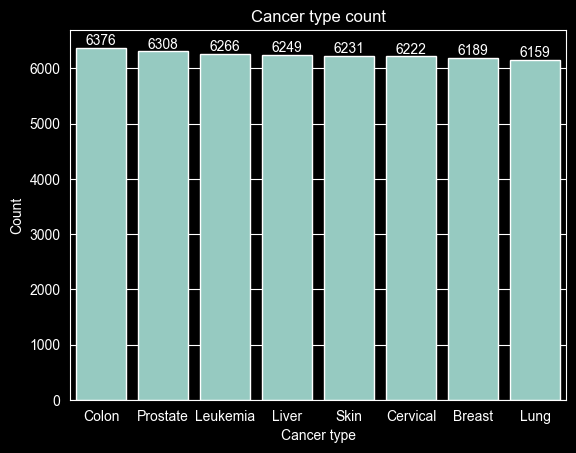

In [10]:
data["Cancer_Type"].value_counts()

sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y=data["Cancer_Type"].value_counts().values)

for i ,v in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i,v,str(v) , ha='center', va='bottom')

plt.title("Cancer type count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

In [ ]:
"""
CANCER_TYPE COLUMN--:
We have in total 8 type of cancer ,with each cancer having approx same number of data points under the label,most common cancer are colon cancer followed by prostate cancer
Cancer_Type is categorical column
"""

In [ ]:
#CANCER Stage

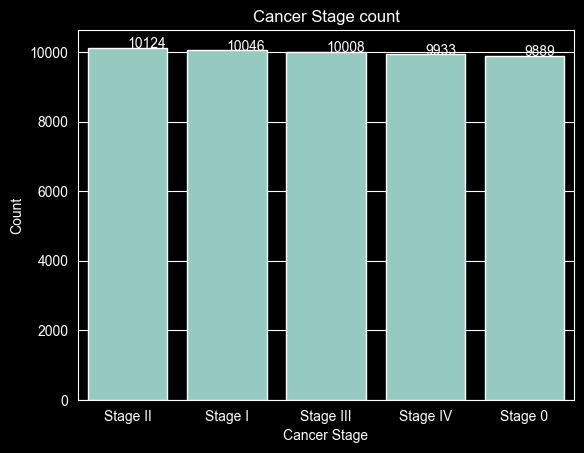

In [12]:
data["Cancer_Stage"].value_counts()

sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y=data["Cancer_Stage"].value_counts().values)

for i ,v in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i,v,str(v) , ha='center', va='bottom')

plt.title("Cancer Stage count")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.show()

In [ ]:
"""
Cancer_Stage--:
Cancer stages have 5 stages with value ranging from 0 to 4 ,with stage 2 the most common one ,and each stage have same number of data points under its label
cancer_stage is a categorical column"""

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [ ]:
#Treatment_Cost_USD

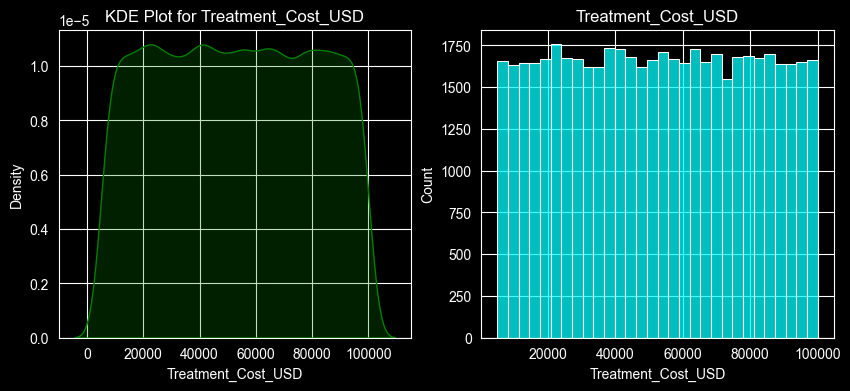

In [18]:

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"] , fill=True ,color = "green")
plt.title("KDE Plot for Treatment_Cost_USD")

plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"] , bins=30 ,kde = False, color = "cyan")
plt.title("Treatment_Cost_USD")
plt.show()


In [19]:
data["Treatment_Cost_USD"].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

In [ ]:
"""
Treatment_Cost_USD--:
Treatment_Cost_USD have no skewness , and there are almost same number of data points under each bin as observed by histogram  """

In [22]:
#ANALYIZING THE RISK FACTORS
columns_of_interest =['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
summary=data[columns_of_interest].agg(["mean","std","min","max"])
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
"""
This variable have nearly identical means and sd ,indicating they were likely designed on the same standardized scale.they are essential in studying interaction effects on survival."""

## Final Dataset Understanding Summary

Based on the initial exploration, the dataset contains 50,000 unique patient records with no duplicate entries and no significant missing values, indicating strong data quality.

The dataset includes a balanced combination of:
- Demographic variables (Age, Gender, Country_Region, Year)
- Lifestyle and environmental risk factors
- Clinical information (Cancer Type and Stage)
- Economic indicators (Treatment Cost)
- Outcome variables (Survival Years and Severity Score)

Risk factor variables appear to be continuous scaled measurements, while cancer-related attributes are categorical, enabling both statistical and comparative analysis.